<a href="https://colab.research.google.com/github/Jared-hub/python-random-quote/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import ternary


In [2]:
from google.colab import files
uploaded = files.upload()


Saving ITEC610_assessment3_data.csv to ITEC610_assessment3_data.csv


In [20]:
# Load the CSV dataset
df = pd.read_csv('ITEC610_assessment3_data.csv')

In [27]:
# Extract the columns of interest
weight_current = df['weight2']
weight_last_year = df['wtyrago']
height = df['htm3']

In [28]:
# Calculate summary statistics
weight_current_stats = weight_current.describe()
weight_last_year_stats = weight_last_year.describe()
height_stats = height.describe()

/usr/local/lib/python3.10/dist-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


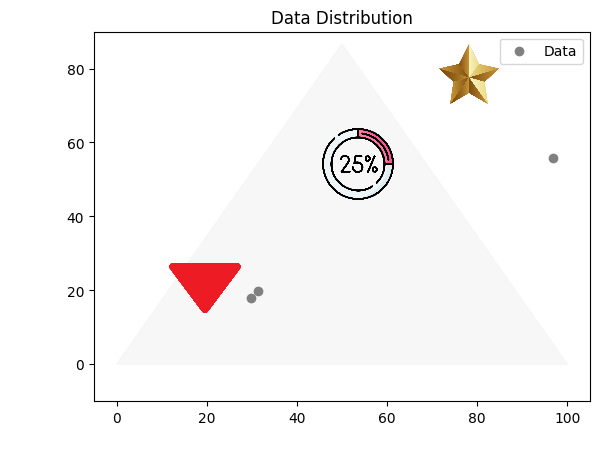

In [47]:
# Create a ternary plot
fig, tax = ternary.figure(scale=100)

# Scatter plot of the data
tax.scatter([(weight_current_stats[i], weight_last_year_stats[i], height_stats[i]) for i in range(len(weight_current_stats))], marker='o', color='gray', label='Data')

# Define the marker icons
icons = {
    'Mean': 'mean.png',
    'Min': 'min.png',
    'Max': 'max.png',
    'Median': 'median.png',
    'Mean_Minus_Std': 'mean - std.png',
    'Mean_Plus_Std': 'mean + std.png',
    '25th_Percentile': '25 perc.png',
    '75th_Percentile': '75 perc.png'
}

# Define the marker sizes
marker_size = 100

# Iterate over the statistics and add the annotation boxes
for stat, icon_path in icons.items():
    # Load the icon image
    icon_data = plt.imread(icon_path)

    # Get the coordinates for the current statistic
    x = weight_current_stats.mean() if stat == 'Mean' else weight_current_stats.quantile(0.25) if stat == '25th_Percentile' else weight_current_stats.quantile(0.75) if stat == '75th_Percentile' else weight_current_stats.min() if stat == 'Min' else weight_current_stats.max() if stat == 'Max' else weight_current_stats.mean() - weight_current_stats.std() if stat == 'Mean_Minus_Std' else weight_current_stats.mean() + weight_current_stats.std() if stat == 'Mean_Plus_Std' else weight_current_stats.median()
    y = weight_last_year_stats.mean() if stat == 'Mean' else weight_last_year_stats.quantile(0.25) if stat == '25th_Percentile' else weight_last_year_stats.quantile(0.75) if stat == '75th_Percentile' else weight_last_year_stats.min() if stat == 'Min' else weight_last_year_stats.max() if stat == 'Max' else weight_last_year_stats.mean() - weight_last_year_stats.std() if stat == 'Mean_Minus_Std' else weight_last_year_stats.mean() + weight_last_year_stats.std() if stat == 'Mean_Plus_Std' else weight_last_year_stats.median()
    z = height_stats.mean() if stat == 'Mean' else height_stats.quantile(0.25) if stat == '25th_Percentile' else height_stats.quantile(0.75) if stat == '75th_Percentile' else height_stats.min() if stat == 'Min' else height_stats.max() if stat == 'Max' else height_stats.mean() - height_stats.std() if stat == 'Mean_Minus_Std' else height_stats.mean() + height_stats.std() if stat == 'Mean_Plus_Std' else height_stats.median()

    # Create an annotation box with the icon at the specified coordinates
    ab = AnnotationBbox(OffsetImage(icon_data, zoom=0.1), (x, y), xycoords='data', frameon=False)
    
    # Add the annotation box to the plot
    tax.get_axes().add_artist(ab)

# Customize the plot
tax.set_title('Data Distribution')
tax.legend()

# Show the plot
plt.show()


Task 2

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# Load the CSV dataset into a DataFrame
df = pd.read_csv('ITEC610_assessment3_data.csv')



In [52]:
df['weight_change'] = df['weight2'] - df['wtyrago']


In [54]:
correlations = df[['weight_change', 'htm3', 'wtkg2', 'weight2', 'wtyrago', 'htm3', 'age']].corr()


In [55]:
highest_corr_variable = correlations['weight_change'].abs().idxmax()


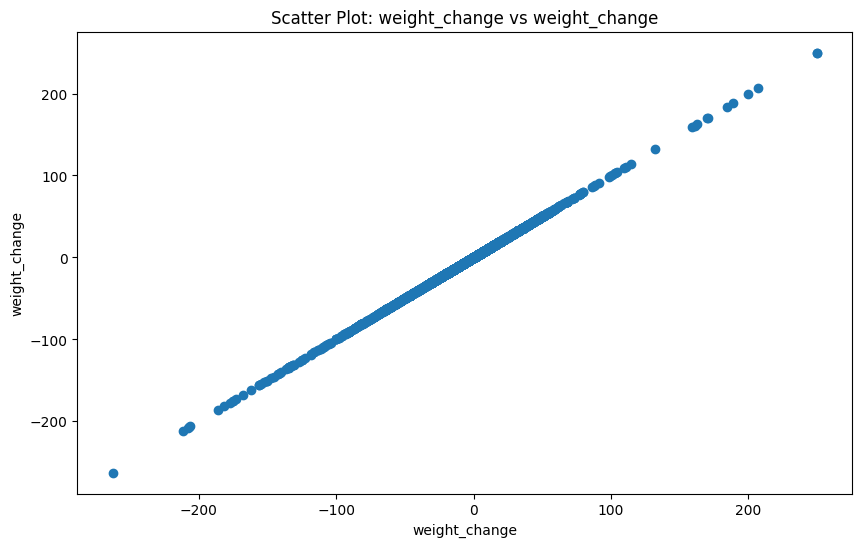

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(df[highest_corr_variable], df['weight_change'])
plt.xlabel(highest_corr_variable)
plt.ylabel('weight_change')
plt.title(f'Scatter Plot: weight_change vs {highest_corr_variable}')
plt.show()


Task3

p-value: nan
Mean difference: nan


<ipython-input-80-d347de816b0a>:14: RuntimeWarning: Mean of empty slice
  mean_difference = np.nanmean(male_weight_change) - np.nanmean(female_weight_change)


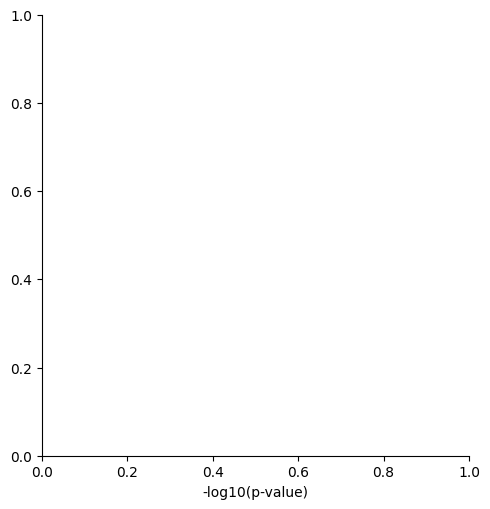

In [80]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Perform t-test for weight_change between male and female groups
male_weight_change = df.loc[df['sex'] == 1, 'weight_change'].dropna()
female_weight_change = df.loc[df['sex'] == 2, 'weight_change'].dropna()

t_statistic, p_value = ttest_ind(male_weight_change, female_weight_change, nan_policy='omit')

# Print the p-value and mean differences
print('p-value:', p_value)
mean_difference = np.nanmean(male_weight_change) - np.nanmean(female_weight_change)
print('Mean difference:', mean_difference)

# Perform t-tests 1000 times and store p-values
p_values = []
for _ in range(1000):
    df_shuffled = df.copy()
    np.random.shuffle(df_shuffled['weight_change'].values)
    male_sample = df_shuffled.loc[df_shuffled['sex'] == 1, 'weight_change'][:len(male_weight_change)].dropna()
    female_sample = df_shuffled.loc[df_shuffled['sex'] == 2, 'weight_change'][:len(female_weight_change)].dropna()
    t_statistic, p_value = ttest_ind(male_sample, female_sample, nan_policy='omit')
    p_values.append(p_value)

# Exclude NaN p-values
p_values = np.array(p_values)
valid_p_values = p_values[~np.isnan(p_values)]

# Plot the distributions of -log10(p-value) for male and female groups
df_subset = df.loc[:len(valid_p_values) - 1].copy()
df_subset['sex_label'] = df_subset['sex'].map({1: 'Male', 2: 'Female'})
sns.displot(data=df_subset, x=-np.log10(valid_p_values), col='sex_label')
plt.xlabel('-log10(p-value)')
plt.show()
